## seaborn.barplot¶
seaborn.barplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x105c7d9e0>, ci=95, n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)
Show point estimates and confidence intervals as rectangular bars.

A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars. Bar plots include 0 in the quantitative axis range, and they are a good choice when 0 is a meaningful value for the quantitative variable, and you want to make comparisons against it.

For datasets where 0 is not a meaningful value, a point plot will allow you to focus on differences between levels of one or more categorical variables.

It is also important to keep in mind that a bar plot shows only the mean (or other estimator) value, but in many cases it may be more informative to show the distribution of values at each level of the categorical variables. In that case, other approaches such as a box or violin plot may be more appropriate.

Input data can be passed in a variety of formats, including:

Vectors of data represented as lists, numpy arrays, or pandas Series objects passed directly to the x, y, and/or hue parameters.

A “long-form” DataFrame, in which case the x, y, and hue variables will determine how the data are plotted.

A “wide-form” DataFrame, such that each numeric column will be plotted.

An array or list of vectors.

In most cases, it is possible to use numpy or Python objects, but pandas objects are preferable because the associated names will be used to annotate the axes. Additionally, you can use Categorical types for the grouping variables to control the order of plot elements.

This function always treats one of the variables as categorical and draws data at ordinal positions (0, 1, … n) on the relevant axis, even when the data has a numeric or date type.

See the tutorial for more information.

Parameters
x, y, huenames of variables in data or vector data, optional
Inputs for plotting long-form data. See examples for interpretation.

dataDataFrame, array, or list of arrays, optional
Dataset for plotting. If x and y are absent, this is interpreted as wide-form. Otherwise it is expected to be long-form.

order, hue_orderlists of strings, optional
Order to plot the categorical levels in, otherwise the levels are inferred from the data objects.

estimatorcallable that maps vector -> scalar, optional
Statistical function to estimate within each categorical bin.

cifloat or “sd” or None, optional
Size of confidence intervals to draw around estimated values. If “sd”, skip bootstrapping and draw the standard deviation of the observations. If None, no bootstrapping will be performed, and error bars will not be drawn.

n_bootint, optional
Number of bootstrap iterations to use when computing confidence intervals.

unitsname of variable in data or vector data, optional
Identifier of sampling units, which will be used to perform a multilevel bootstrap and account for repeated measures design.

seedint, numpy.random.Generator, or numpy.random.RandomState, optional
Seed or random number generator for reproducible bootstrapping.

orient“v” | “h”, optional
Orientation of the plot (vertical or horizontal). This is usually inferred from the dtype of the input variables, but can be used to specify when the “categorical” variable is a numeric or when plotting wide-form data.

colormatplotlib color, optional
Color for all of the elements, or seed for a gradient palette.

palettepalette name, list, or dict, optional
Colors to use for the different levels of the hue variable. Should be something that can be interpreted by color_palette(), or a dictionary mapping hue levels to matplotlib colors.

saturationfloat, optional
Proportion of the original saturation to draw colors at. Large patches often look better with slightly desaturated colors, but set this to 1 if you want the plot colors to perfectly match the input color spec.

errcolormatplotlib color
Color for the lines that represent the confidence interval.

errwidthfloat, optional
Thickness of error bar lines (and caps).

capsizefloat, optional
Width of the “caps” on error bars.

dodgebool, optional
When hue nesting is used, whether elements should be shifted along the categorical axis.

axmatplotlib Axes, optional
Axes object to draw the plot onto, otherwise uses the current Axes.

kwargskey, value mappings
Other keyword arguments are passed through to matplotlib.axes.Axes.bar().

Returns
axmatplotlib Axes
Returns the Axes object with the plot drawn onto it.

Examples

Draw a set of vertical bar plots grouped by a categorical variable:

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid')
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


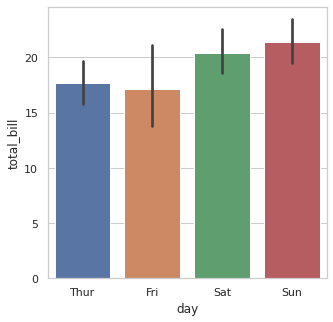

In [4]:
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(x='day', y='total_bill', data=tips)
plt.show()


Draw a set of vertical bars with nested grouping by a two variables:`

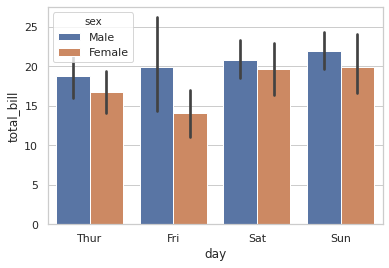

In [5]:
sns.barplot(x='day', y='total_bill', hue='sex', data=tips)
plt.show()

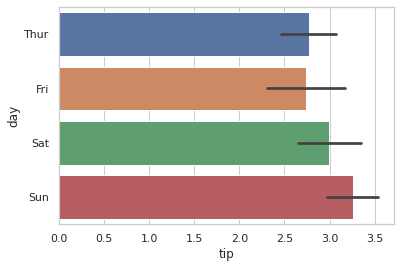

In [8]:
#Draw a set of horizontal bars:

ax = sns.barplot(x="tip", y="day", data=tips)

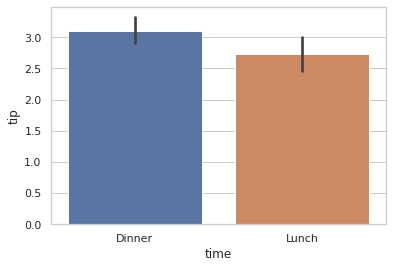

In [9]:
#Control bar order by passing an explicit order:

ax = sns.barplot(x="time", y="tip", data=tips,
                 order=["Dinner", "Lunch"])

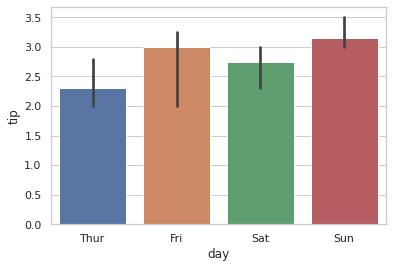

In [10]:
#Use median as the estimate of central tendency:

from numpy import median
ax = sns.barplot(x="day", y="tip", data=tips, estimator=median)

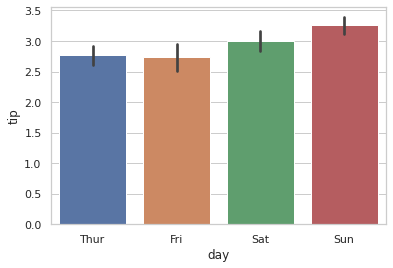

In [11]:
#Show the standard error of the mean with the error bars:

ax = sns.barplot(x="day", y="tip", data=tips, ci=68)

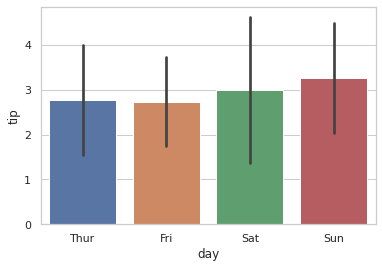

In [12]:
#Show standard deviation of observations instead of a confidence interval:

ax = sns.barplot(x="day", y="tip", data=tips, ci="sd")

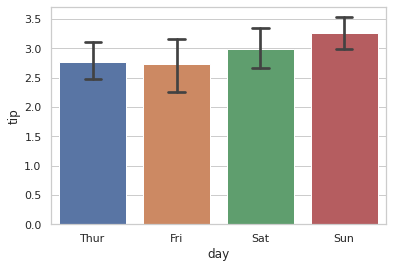

In [13]:
#Add “caps” to the error bars:

ax = sns.barplot(x="day", y="tip", data=tips, capsize=.2)

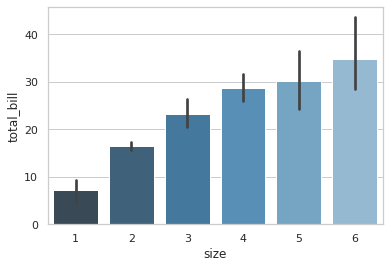

In [14]:
#Use a different color palette for the bars:

ax = sns.barplot("size", y="total_bill", data=tips,
                 palette="Blues_d")

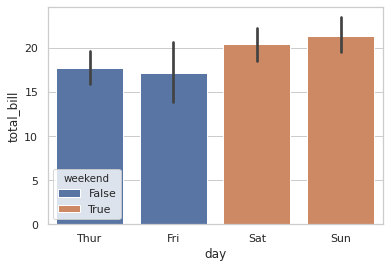

In [15]:
# Use hue without changing bar position or width:

tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
ax = sns.barplot(x="day", y="total_bill", hue="weekend",
                 data=tips, dodge=False)

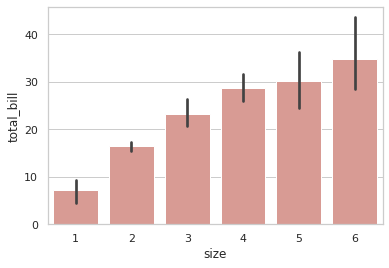

In [16]:
#Plot all bars in a single color:

ax = sns.barplot("size", y="total_bill", data=tips,
                 color="salmon", saturation=.5)

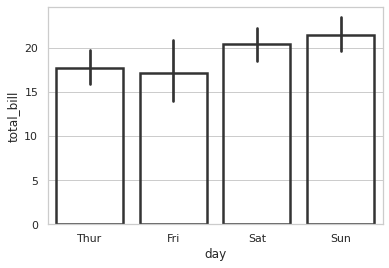

In [17]:
#Use matplotlib.axes.Axes.bar() parameters to control the style.

ax = sns.barplot("day", "total_bill", data=tips,
                 linewidth=2.5, facecolor=(1, 1, 1, 0),
                 errcolor=".2", edgecolor=".2")

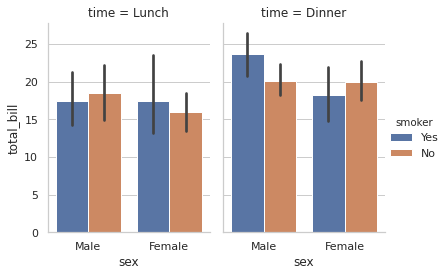

In [18]:
#Use catplot() to combine a barplot() and a FacetGrid. This allows grouping within additional categorical variables. Using catplot() is safer than using FacetGrid directly, as it ensures synchronization of variable order across facets:

g = sns.catplot(x="sex", y="total_bill",
                hue="smoker", col="time",
                data=tips, kind="bar",
                height=4, aspect=.7);

### seaborn.countplot¶
seaborn.countplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)
Show the counts of observations in each categorical bin using bars.

A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. The basic API and options are identical to those for barplot(), so you can compare counts across nested variables.

Input data can be passed in a variety of formats, including:

Vectors of data represented as lists, numpy arrays, or pandas Series objects passed directly to the x, y, and/or hue parameters.

A “long-form” DataFrame, in which case the x, y, and hue variables will determine how the data are plotted.

A “wide-form” DataFrame, such that each numeric column will be plotted.

An array or list of vectors.

In most cases, it is possible to use numpy or Python objects, but pandas objects are preferable because the associated names will be used to annotate the axes. Additionally, you can use Categorical types for the grouping variables to control the order of plot elements.

This function always treats one of the variables as categorical and draws data at ordinal positions (0, 1, … n) on the relevant axis, even when the data has a numeric or date type.

See the tutorial for more information.

Parameters
x, y, huenames of variables in data or vector data, optional
Inputs for plotting long-form data. See examples for interpretation.

dataDataFrame, array, or list of arrays, optional
Dataset for plotting. If x and y are absent, this is interpreted as wide-form. Otherwise it is expected to be long-form.

order, hue_orderlists of strings, optional
Order to plot the categorical levels in, otherwise the levels are inferred from the data objects.

orient“v” | “h”, optional
Orientation of the plot (vertical or horizontal). This is usually inferred from the dtype of the input variables, but can be used to specify when the “categorical” variable is a numeric or when plotting wide-form data.

colormatplotlib color, optional
Color for all of the elements, or seed for a gradient palette.

palettepalette name, list, or dict, optional
Colors to use for the different levels of the hue variable. Should be something that can be interpreted by color_palette(), or a dictionary mapping hue levels to matplotlib colors.

saturationfloat, optional
Proportion of the original saturation to draw colors at. Large patches often look better with slightly desaturated colors, but set this to 1 if you want the plot colors to perfectly match the input color spec.

dodgebool, optional
When hue nesting is used, whether elements should be shifted along the categorical axis.

axmatplotlib Axes, optional
Axes object to draw the plot onto, otherwise uses the current Axes.

kwargskey, value mappings
Other keyword arguments are passed through to matplotlib.axes.Axes.bar().

Returns
axmatplotlib Axes
Returns the Axes object with the plot drawn onto it.

Examples

Show value counts for a single categorical variable:

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


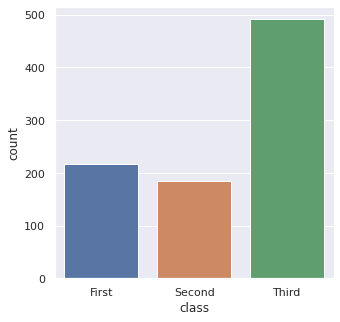

In [20]:
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.countplot(x='class', data=titanic)
plt.show()

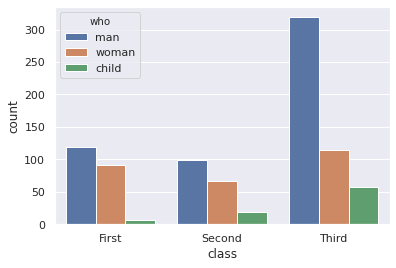

In [21]:
#Show value counts for two categorical variables:
ax = sns.countplot(x='class', hue='who', data=titanic)
plt.show()

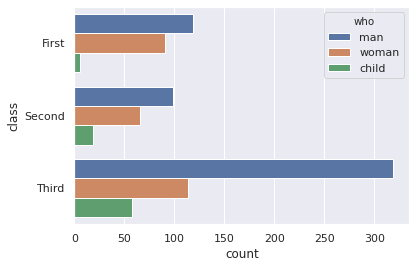

In [22]:
# Plot the bars horizontally:
ax = sns.countplot(y='class', hue='who', data=titanic)
plt.show()

Use a different color palette:

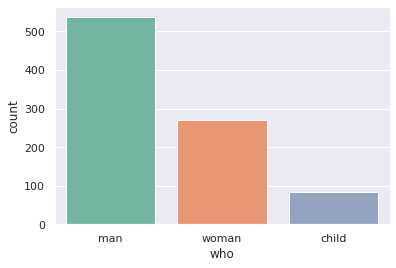

In [23]:
ax = sns.countplot(x='who', data=titanic, palette='Set2')
plt.show()

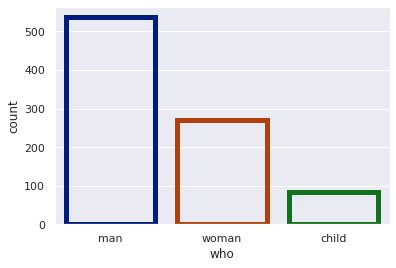

In [24]:
#Use matplotlib.axes.Axes.bar() parameters to control the style.

ax = sns.countplot(x="who", data=titanic,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))

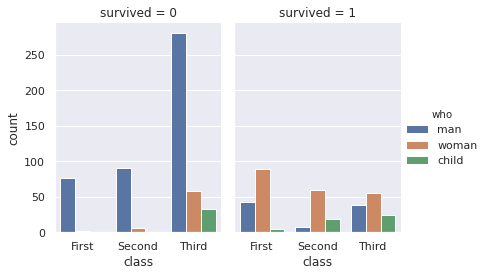

In [25]:
g = sns.catplot(x="class", hue="who", col="survived",
                data=titanic, kind="count",
                height=4, aspect=.7);